# Exercice 4: Manipulation de rasters avec QGIS - partie 2 | Chargement et affichage avec python
O. Kaufmann 2023, 2026.

In [1]:

# @info: Execute me to activate interactive questions
# ---------------------------------------------------

# O. KAUFMANN, 2024. 

from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
import ipywidgets as widgets
from IPython.display import HTML, clear_output
import codecs

def decode_text(text):
    return codecs.decode(text, 'hex').decode('utf')

def encode_text(text):
    return codecs.encode(codecs.encode(text,'utf8'), 'hex').decode('utf')
    
@magic_arguments.magic_arguments()
@magic_arguments.argument('--prompt', default='none', help='Encoded prompt')
@magic_arguments.argument('--answer', default='none', help='Encoded answer')
@magic_arguments.argument('--title', default='Question', help='First line of alert block')
@magic_arguments.argument('--button-label', default='Solution', help='Text to display on button')
@magic_arguments.argument('--div-type', default='alert-warning', help='Type of alert block')
    
@register_cell_magic
def display_prompt(line, cell):
    args = magic_arguments.parse_argstring(display_prompt, line)
    title = args.title
    prompt = args.prompt
    answer = args.answer
    button_label = args.button_label
    div_type = args.div_type
    def make_block(text, title=title, label=button_label, div_type=div_type):
        if title != 'none':
            return HTML(f"""<div class="alert alert-block {div_type}"> <b>{title}</b><br> {text} </div>""")
        else:
            return HTML(f"""<div class="alert alert-block {div_type}"> {text} </div>""")
    if prompt != 'none':
        display(make_block(decode_text(prompt)))
    toggle_button = widgets.ToggleButton(description=button_label)
    output = widgets.Output()
    def on_button_clicked(b):
        with output:
            if b['new']:  
                display(HTML(decode_text(answer)))
            else:
                output.clear_output()
    toggle_button.observe(on_button_clicked, 'value')
    display(toggle_button)
    display(output)

HTML("""<div class="alert alert-block alert-success"> <b>Success:</b><br>Interactive questions activated.</div>""")


Important: Exécutez-moi pour activer les questions interactives.

***
## 1. Préparation	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA0wDTANOnA7bxAAAACXBIWXMAAC4jAAAuIwF4pT92AAAAB3RJTUUH6AwJEjgOYb53JgAAABl0RVh0Q29tbWVudABDcmVhdGVkIHdpdGggR0lNUFeBDhcAAAroSURBVHja3Zt5WFZVGsB/534fKAEuD2ih6ZQo6pgsoZW5tNhDPfm4sGiTkwqKoiVZmo5LpuZak40ohWva4tSoGJajUi45huVTargUIJOOy6A4prIrcN/5Az5AgW+5fIAz53nOP/fec++5v/O+73nP+56jaOCy6G/Q3K1TMxFpLSLuoECRqymyRZE3cWBmg/ZH1dubE6KJ9/kmQJBHgECgO9AOaG+llQD/As4CJ4CjCnVw4pDMn/8nALy3rVNTXfQBwFDgKcDLSa/OBpJBJaLUjtjBp4rvKADLkzp2BZkIvAA0q2ep/Q3hY6VUfOyQzMxGBbA8qaO/iMwFQhtJUz9TMO/l0My0BgUQl+TnJaIvAcbUqx2xr+hAgkKbNSk043q9AnhyUEsGRnpFKFh5u34LjV4uAmNfDcvcXi8Aln3e0U2EFeWjXqsJvwNKHEqmTQ79502nAVi6tdM9CkkCHna0N+L0h+3q8gGlGDI57NRvdX7b0q2d2yP6fuA+o0PSSJKRoVD9p4RnnDcM4J2tfu0ROWDDeblTAYDwq0Lr91pE+gWHAfx5i18LkEOAnxO7lAP8CKQDp4C88usugC9wP9BT4F4nfjNVKdVnanhGnt0A4v/eTRUU3vyq3Juru+MCHwOJyoWUqYNP6VaN7ZbfU0xJJ0EigNECHZ1g07f7dHYbOLJ7qn0t3triNxeYU0f5zkbxplKsnxaeUWCE3PH/vMaOfV+EAvMFutVxIGZNH5qxyCaAJZs79wD5HjDV4WPxSjHzTxEZuc6Q4bcTu5h0XZ8sMA9wM/iamwrVc/rQ9GO1Ali4pZumSfFRwN/gR66DGj5jaPqO+rBpizf7BQFJIoaN8o+euPWMHVapCtotNPTisSL4i4CBek6Eh+vr5wFmDM04iqheAielXPvsrwpB9cilKKpGCVi8uUsTXeQ04GOgb1lKqUdnDk070yBBlU1d7hEkBehgYIo9p2km35kRPxffIgGlukSK4GNg5AsFBjfUzwPMHJZ2UYRnRMjH8f62Ky0tHXGLCqxM7oVArONiBQJTXh+W/kND+zivP5d+SiBGrExOVmrspr0xlQCyr119WKCbgZ/fN9sjPaGxHD0fV7eNIiTXNNI2JCPwl+z9wRUARBgqonC0gnqZAY237IsO/QlBTSk3cNUqNdTKewwD0DZ++xQCoQZGf9Mbz6WdaOy175w/pJ0U2GqvDbBIhi5lUSzt1PkLvxOhg6PGj7LYwB1RREhwZPDKbUSnOZ92bafpIo8aGP3TmEzf3ikAzK29dgtkGYDQWxNUcMWNihG2qfufzx128k75f2b3T0FE7XTcjvGghuCHKJCqRsIGQWE/d1gROGBAkjuba1p72+Fd/WSkk9cWB6xXbp6dbTx2GqWim086UOigHUg10KV2mgjta7KUt9cq9/X5z886ayh+nXPeXwpyegHW6nBEdlxf0c+hVZ/SXAysD2inCXg5ZjxUplIvGBZVPfcCUnDN1mOPU6rvyFne9y573+vu7nZTcNiX8dbsdnrKqwj5ddVXPTcLPf+qTQiiy66c5f3sgjBj0CFEuOqoFGgGxMYpmSDJu4ieZzNq3Vd0fVdOnH0QBEwNAaC50yx3/iX03Cu2IYienBPXx93aQ28k9kOEZo46dJoIZxxsdP8nP0533vRVkG0PhD4iJOfE1W4TbhRdbVbbmsBK/dUsqCuOJj1Sf/nSD8hwKgQEk+99JZhUbSr2CK7mXXlZMQM8fFZVizWWlupdDHz6qlmEdCDYwYZBzgRQBuEy0qt7iebu3dSqOsBXudkTQjxbJ+Tepv/BBj6bpgmkG7ADRvMFX1iFoF9H120axkeA3XmXJ7S4XTAF8u3qv0WdywEcNhAGGzhtY4DmeJy/eB6wwDqEXPRSmzbhIRG+zr08vqXlwtKRJw8i6mkRlW9zWrfYAFGHNUT7TlDioPG4u7ik9FlHATy2JoefLpbMBuZbd2vzKLp5WU+7WFCSdqnWGnj4bF7yW9uGeFvavTvqRAoQYqckCKiDCuCVDx/4HsdT398sG3XiCSN68HH4XQzwc6uWfdKig4twMzcFyC0qLYn/Lsfc0r01NlyPVJSETB+8Ldty4ZUND/QWSAasTZ0pcZEn+lhCYl8aUIPHJ33YvZ8RACMSC9iXWTgXmGvtuaLiXH7Lv4SIWAt4BoioPYuThtxtub8s0i5J2F4ZFldqo6GIsMiK2A0BZiMQwjcXkPDDzXnAG7V7doqi4nyu5F9CF6rF+qqo5AOC2rcoKbQipxEXeeIgqBARlVdLTGNjBYC4UcfPiKg9BgKj/oj+utGpb9buXD49XjQfmF3LEhcRuFGcz5W8i+giNUV1LLWrwN6F20LbWNovjzx+EHjmdkkAdi6PPH7u9tRYnMG8wBsT13cPMQrhpe35rDhUvACYZS2uf6OkdghVSheEfyxKCmtrubAi6ngKqBCBvCrt4qrlBldEtftS4JgBW6BESHzpg+49DEd29+aw5FDxItzM82qSgFskITcLvUwfaqu+usj+BZ+HVQR64qOOHaQyk3QYzMk1JEd3IMIMg1LgIfD1ix/49zIK4e29OcxefHIJMMNadudGSSFX8rIoFcFKPsAXODA/Kayd5V3vjbZIgpoWH3W0enIU4C/Jr5JxYc9O4BmD/1GIEJ0w5thfjYKIienAW3O6TMspKl24eF9WrQbWxeyGl4cPmrLqj51B8djs0K21RrCqTbATPvC/X4RjgEcdXPuNSqlJCaNTrxhpHBbWljcXdJ0c/132UmvPuZialkHQrO7lOCvQd05YzRBq9DDGr/OPFFhfx/XNVWAhqJWrxqQ6HEW6r6c7T4/3nQK8YzUnoDXBy7MNJguEmiO6Z0H1nROeeNYuAAAxa/03CIxywkLvKvAJqE1KmVJWjTlid0q/VY9WhI73cRxCzb91FtRjc8O3nLELwLh1/k0R9ZVAXyeueq8Bh4C08uV0cZV+/I6yHWG6JqbRq8YeKQTw9fXlyRkerwLvWofgirdn2yoQaizngH5zwxPP2AQAMHZdQHOEfSIENXCe42sUg9ZGpxZZLkSvCbAJwaS50sqzDSbNqnN6HnhiXkRipk0AZR8O9ALZIfBQA0PYbVKug1ZH/1CRIBmzJmASsMy2JNiEcEHg8fkRiZl2RXij1wa6i0gi8LTTt71afaHao1AD1407WgFh9JqASYh1CCbNBW/PtpitQlD/BvrbHeIeuzZYK9VLFwLTG3jv715M2sD1Y45UbLaMWh0YCyy3CcGjDWaTi7XHshyO8UetDgwB1nFbTrGeoexTogasj6mUhKjVgbFiC4Iy4+XZBheTK3Y7QvZBCPIUkfnARKrsKK1nCN8opQ3YMK5SEiJXBU4UrG/U0JSJVp5tcTG7Og9AZQeCOgsyB3i+oSBoqsmzG8YdqpCEUasCXxKItwXB27MtrjVAcEqaa+SqoE5ALMIIoIVDds7xkvhRzJEIVZ4+8PX1pffUZi8KvGcdglYOoYnzAVSMxurgprpecXAyBGjpJAiXgV0Ktii0nR+NP1zt4OSIlUGGINTbkbfIz3pTcq0wmLKjs0GUHZ3tIOCtaoMioBSXgNPAMeAokHJvp7bHl/S3fhjM19eXXlObTRDhfasTq9JoVQVCg5/5G7n6IU3XS3xExNsSj1BQilKX73JtcXH16L11EpY/JgSNF0iwCcGjDa4uTRv90GO9lOEJD9qGgIa3p8//JwCA4e8HdxHE6jYbs8mV/wKrUl4DncB6WAAAAABJRU5ErkJggg==" width="24"/>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     La première partie de cet exercice est à réaliser dans QGIS. Le notebook sert à vous guider dans la réalisation de l'exercice. Vous pouvez aussi vous en servir pour rassembler vos notes en cours de résolution de l'exercice. Lancez QGIS avant de continuer.
</div>

<div class="alert alert-block alert-success">
	<b>1.1 Préliminaire</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 1.1.1: </b><br>Ouvrez le projet QGIS Exercice_04.qgz.
</div>

***
## 2. Couches raster	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA0wDTANOnA7bxAAAACXBIWXMAAC4jAAAuIwF4pT92AAAAB3RJTUUH6AwJEjgOYb53JgAAABl0RVh0Q29tbWVudABDcmVhdGVkIHdpdGggR0lNUFeBDhcAAAroSURBVHja3Zt5WFZVGsB/534fKAEuD2ih6ZQo6pgsoZW5tNhDPfm4sGiTkwqKoiVZmo5LpuZak40ohWva4tSoGJajUi45huVTargUIJOOy6A4prIrcN/5Az5AgW+5fIAz53nOP/fec++5v/O+73nP+56jaOCy6G/Q3K1TMxFpLSLuoECRqymyRZE3cWBmg/ZH1dubE6KJ9/kmQJBHgECgO9AOaG+llQD/As4CJ4CjCnVw4pDMn/8nALy3rVNTXfQBwFDgKcDLSa/OBpJBJaLUjtjBp4rvKADLkzp2BZkIvAA0q2ep/Q3hY6VUfOyQzMxGBbA8qaO/iMwFQhtJUz9TMO/l0My0BgUQl+TnJaIvAcbUqx2xr+hAgkKbNSk043q9AnhyUEsGRnpFKFh5u34LjV4uAmNfDcvcXi8Aln3e0U2EFeWjXqsJvwNKHEqmTQ79502nAVi6tdM9CkkCHna0N+L0h+3q8gGlGDI57NRvdX7b0q2d2yP6fuA+o0PSSJKRoVD9p4RnnDcM4J2tfu0ROWDDeblTAYDwq0Lr91pE+gWHAfx5i18LkEOAnxO7lAP8CKQDp4C88usugC9wP9BT4F4nfjNVKdVnanhGnt0A4v/eTRUU3vyq3Juru+MCHwOJyoWUqYNP6VaN7ZbfU0xJJ0EigNECHZ1g07f7dHYbOLJ7qn0t3triNxeYU0f5zkbxplKsnxaeUWCE3PH/vMaOfV+EAvMFutVxIGZNH5qxyCaAJZs79wD5HjDV4WPxSjHzTxEZuc6Q4bcTu5h0XZ8sMA9wM/iamwrVc/rQ9GO1Ali4pZumSfFRwN/gR66DGj5jaPqO+rBpizf7BQFJIoaN8o+euPWMHVapCtotNPTisSL4i4CBek6Eh+vr5wFmDM04iqheAielXPvsrwpB9cilKKpGCVi8uUsTXeQ04GOgb1lKqUdnDk070yBBlU1d7hEkBehgYIo9p2km35kRPxffIgGlukSK4GNg5AsFBjfUzwPMHJZ2UYRnRMjH8f62Ky0tHXGLCqxM7oVArONiBQJTXh+W/kND+zivP5d+SiBGrExOVmrspr0xlQCyr119WKCbgZ/fN9sjPaGxHD0fV7eNIiTXNNI2JCPwl+z9wRUARBgqonC0gnqZAY237IsO/QlBTSk3cNUqNdTKewwD0DZ++xQCoQZGf9Mbz6WdaOy175w/pJ0U2GqvDbBIhi5lUSzt1PkLvxOhg6PGj7LYwB1RREhwZPDKbUSnOZ92bafpIo8aGP3TmEzf3ikAzK29dgtkGYDQWxNUcMWNihG2qfufzx128k75f2b3T0FE7XTcjvGghuCHKJCqRsIGQWE/d1gROGBAkjuba1p72+Fd/WSkk9cWB6xXbp6dbTx2GqWim086UOigHUg10KV2mgjta7KUt9cq9/X5z886ayh+nXPeXwpyegHW6nBEdlxf0c+hVZ/SXAysD2inCXg5ZjxUplIvGBZVPfcCUnDN1mOPU6rvyFne9y573+vu7nZTcNiX8dbsdnrKqwj5ddVXPTcLPf+qTQiiy66c5f3sgjBj0CFEuOqoFGgGxMYpmSDJu4ieZzNq3Vd0fVdOnH0QBEwNAaC50yx3/iX03Cu2IYienBPXx93aQ28k9kOEZo46dJoIZxxsdP8nP0533vRVkG0PhD4iJOfE1W4TbhRdbVbbmsBK/dUsqCuOJj1Sf/nSD8hwKgQEk+99JZhUbSr2CK7mXXlZMQM8fFZVizWWlupdDHz6qlmEdCDYwYZBzgRQBuEy0qt7iebu3dSqOsBXudkTQjxbJ+Tepv/BBj6bpgmkG7ADRvMFX1iFoF9H120axkeA3XmXJ7S4XTAF8u3qv0WdywEcNhAGGzhtY4DmeJy/eB6wwDqEXPRSmzbhIRG+zr08vqXlwtKRJw8i6mkRlW9zWrfYAFGHNUT7TlDioPG4u7ik9FlHATy2JoefLpbMBuZbd2vzKLp5WU+7WFCSdqnWGnj4bF7yW9uGeFvavTvqRAoQYqckCKiDCuCVDx/4HsdT398sG3XiCSN68HH4XQzwc6uWfdKig4twMzcFyC0qLYn/Lsfc0r01NlyPVJSETB+8Ldty4ZUND/QWSAasTZ0pcZEn+lhCYl8aUIPHJ33YvZ8RACMSC9iXWTgXmGvtuaLiXH7Lv4SIWAt4BoioPYuThtxtub8s0i5J2F4ZFldqo6GIsMiK2A0BZiMQwjcXkPDDzXnAG7V7doqi4nyu5F9CF6rF+qqo5AOC2rcoKbQipxEXeeIgqBARlVdLTGNjBYC4UcfPiKg9BgKj/oj+utGpb9buXD49XjQfmF3LEhcRuFGcz5W8i+giNUV1LLWrwN6F20LbWNovjzx+EHjmdkkAdi6PPH7u9tRYnMG8wBsT13cPMQrhpe35rDhUvACYZS2uf6OkdghVSheEfyxKCmtrubAi6ngKqBCBvCrt4qrlBldEtftS4JgBW6BESHzpg+49DEd29+aw5FDxItzM82qSgFskITcLvUwfaqu+usj+BZ+HVQR64qOOHaQyk3QYzMk1JEd3IMIMg1LgIfD1ix/49zIK4e29OcxefHIJMMNadudGSSFX8rIoFcFKPsAXODA/Kayd5V3vjbZIgpoWH3W0enIU4C/Jr5JxYc9O4BmD/1GIEJ0w5thfjYKIienAW3O6TMspKl24eF9WrQbWxeyGl4cPmrLqj51B8djs0K21RrCqTbATPvC/X4RjgEcdXPuNSqlJCaNTrxhpHBbWljcXdJ0c/132UmvPuZialkHQrO7lOCvQd05YzRBq9DDGr/OPFFhfx/XNVWAhqJWrxqQ6HEW6r6c7T4/3nQK8YzUnoDXBy7MNJguEmiO6Z0H1nROeeNYuAAAxa/03CIxywkLvKvAJqE1KmVJWjTlid0q/VY9WhI73cRxCzb91FtRjc8O3nLELwLh1/k0R9ZVAXyeueq8Bh4C08uV0cZV+/I6yHWG6JqbRq8YeKQTw9fXlyRkerwLvWofgirdn2yoQaizngH5zwxPP2AQAMHZdQHOEfSIENXCe42sUg9ZGpxZZLkSvCbAJwaS50sqzDSbNqnN6HnhiXkRipk0AZR8O9ALZIfBQA0PYbVKug1ZH/1CRIBmzJmASsMy2JNiEcEHg8fkRiZl2RXij1wa6i0gi8LTTt71afaHao1AD1407WgFh9JqASYh1CCbNBW/PtpitQlD/BvrbHeIeuzZYK9VLFwLTG3jv715M2sD1Y45UbLaMWh0YCyy3CcGjDWaTi7XHshyO8UetDgwB1nFbTrGeoexTogasj6mUhKjVgbFiC4Iy4+XZBheTK3Y7QvZBCPIUkfnARKrsKK1nCN8opQ3YMK5SEiJXBU4UrG/U0JSJVp5tcTG7Og9AZQeCOgsyB3i+oSBoqsmzG8YdqpCEUasCXxKItwXB27MtrjVAcEqaa+SqoE5ALMIIoIVDds7xkvhRzJEIVZ4+8PX1pffUZi8KvGcdglYOoYnzAVSMxurgprpecXAyBGjpJAiXgV0Ktii0nR+NP1zt4OSIlUGGINTbkbfIz3pTcq0wmLKjs0GUHZ3tIOCtaoMioBSXgNPAMeAokHJvp7bHl/S3fhjM19eXXlObTRDhfasTq9JoVQVCg5/5G7n6IU3XS3xExNsSj1BQilKX73JtcXH16L11EpY/JgSNF0iwCcGjDa4uTRv90GO9lOEJD9qGgIa3p8//JwCA4e8HdxHE6jYbs8mV/wKrUl4DncB6WAAAAABJRU5ErkJggg==" width="24"/>

<div class="alert alert-block alert-success">
	<b>2.1 Exploitation de couches de services externes</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.1.1: </b><br>En vous basant sur la couche OpenTopoMap, déterminez l'altitude approximative de la gare de Mons. 
</div>

<b>Note:</b><br>    Pour faire l'estimation utilisez plutôt un MNT servi au format WMS par la Wallonie


<div class="alert alert-block alert-success">
	<b>2.2 Ajout d'un raster grid</b>
</div>

<b>Note:</b><br>    Pour cette partie, un fichier raster représentant un modèle numérique de terrain de la région montoise vous est fourni dans le dossier `data`. 


<div class="alert alert-block alert-warning">
<b>Question 2.2.1: </b><br>Vérifiez votre estimation à l'aide de la couche fournie DEM_Mons_v2.tif
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.2: </b><br>Pourquoi la couche DEM_Mons_v2.tif ne s'affiche-t-elle pas?
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.3: </b><br>Ajoutez une couche représentant le modèle numérique de terrain à votre carte. 
</div>

<div class="alert alert-block alert-success">
	<b>2.3 Définition d'une colormap et classification</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.3.1: </b><br>Définissez pour le modèle numérique de terrain DEM_Mons_v2.tif une colormap comme celle ci-dessous:
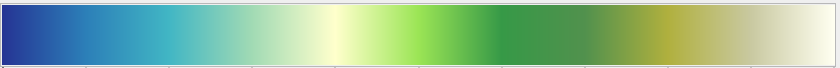
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.3.2: </b><br>Affichez le modèle numérique de terrain avec cette colormap. Qu'avez-vous choisi comme bornes pour la colormap? Pourquoi?
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.3.3: </b><br>Quelle est l'altitude de la Gare de Mons fournie par ce modèle numérique de terrain?
    Est-ce compatible avec votre estimation?
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.3.4: </b><br>Essayez de modifier la colormap du MNT de la Wallonie de la même manière que précédemment. Que constatez-vous? Pourquoi?
</div>

***
## 3. Chargement et affichage d'un raster dans python avec rasterio et matplotlib	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     La suite de l'exercice est à realiser directement dans le notebook.
</div>

<div class="alert alert-block alert-success">
	<b>3.1 Imports</b>
</div>

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
from rasterio.plot import show

In [ ]:

%%display_prompt --title Question 3.1.1: --prompt 456e20766f75732073657276616e74206465206c6120646f63756d656e746174696f6e20646520726173746572696f20636865726368657a20c3a02071756f692073657274206c6120666f6e6374696f6e20606f70656e6020646520726173746572696f2e0a --answer 202020204c6120666f6e6374696f6e20606f70656e60207265746f75726e6520756e206f626a657420717569207065726d6574206465206c697265206f75206427c3a96372697265206475206a657520646520646f6e6ec3a96573207261737465722e
# @info: Exécutez-moi pour afficher la question

Question 3.1.1: En vous servant de la documentation de rasterio cherchez à quoi sert la fonction `open` de rasterio.

<b>Note:</b><br>    Indice: Vous pouvez obtenir de l'aide sur une fonction ou une méthode de python dans la <i>docstring</i>. Pour afficher la <i>docstring</i> dans le notebook, appuyez simultanément sur les touches <shift> et <tab> après la parenthèse. Par exemple, pour obtenir de l'aide sur la fonction plot de matplotlib.pyplot vous pouvez appuyer sur ces touches après avoir tape le code suivant<br>
    `plt.plot(`


<div class="alert alert-block alert-warning">
<b>Question 3.1.2: </b><br>Utilisez la fonction `open` pour accéder au modèle de terrain de Mons. Vérifiez le type de l'objet retourné par cette fonction.
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.1.3: </b><br>En vous servant de la documentation de rasterio cherchez à quoi sert la methode `read` de cet objet. 
</div>

In [ ]:
# Résultat attendu ci-dessous...

array([[[ 28.8388,  28.77  ,  28.26  , ...,  49.695 ,  49.79  ,
          49.75  ],
        [ 28.94  ,  28.4356,  28.02  , ...,  49.39  ,  49.46  ,
          49.74  ],
        [ 28.4796,  28.39  ,  28.0923, ...,  49.205 ,  49.28  ,
          49.62  ],
        ...,
        [143.825 , 143.525 , 143.15  , ..., 128.16  , 128.32  ,
         128.22  ],
        [143.985 , 143.69  , 143.46  , ..., 128.39  , 128.47  ,
         128.441 ],
        [144.08  , 143.97  , 143.7   , ..., 128.665 , 128.7   ,
         128.75  ]]], dtype=float32)

<div class="alert alert-block alert-warning">
<b>Question 3.1.4: </b><br>En vous servant de la documentation de rasterio cherchez comment se servir de la fonction `show` de rasterio.</br>
    Complétez le code ci-dessous pour afficher le modèle numérique de terrain avec une colormap adaptée.
<pre><code>
fig, ax = plt.subplots(figsize=(...))
... = show(dem, ax=ax, cmap=..., vmin=...)
im = ax.get_images()[0]
fig.colorbar(im, ax=ax)
</code></pre>
</div>

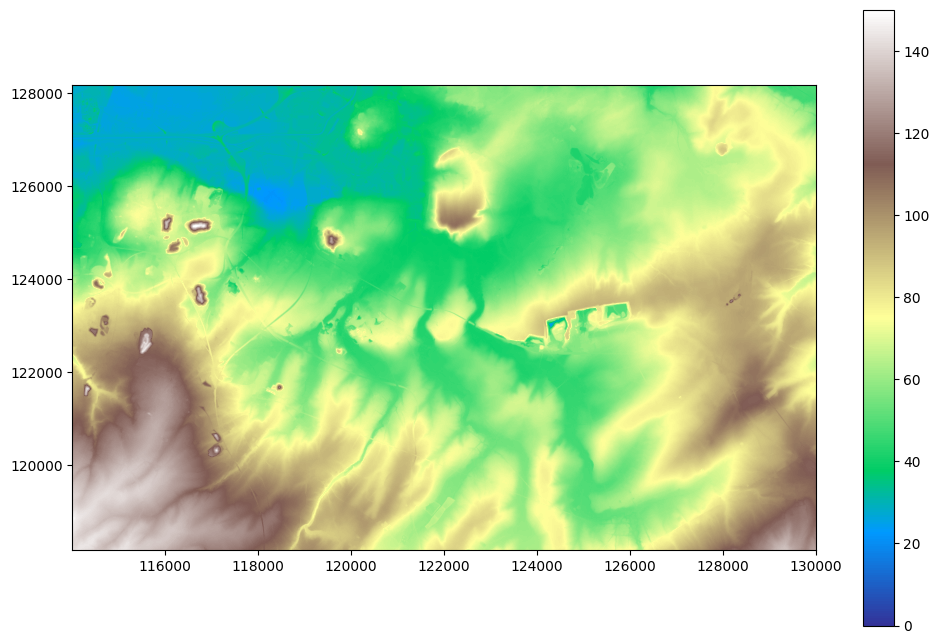

In [ ]:
# Résultat attendu ci-dessous...